In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# -------------------------
# IMPORTS
# -------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# -------------------------
# EXTRACT
# -------------------------
df = pd.read_csv("/content/drive/My Drive/BI/consumer_behavior_and_shopping_habits.csv")

# -------------------------
# INITIAL EDA (PROFILING)
# -------------------------
print(df.head())
print(df.info())
print(df.describe(include="all"))

# Missing values
print("\nMissing values per column:\n", df.isna().sum())

# Duplicates
print("Duplicate rows:", df.duplicated().sum())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [3]:
Q1 = df["Purchase Amount (USD)"].quantile(0.25)
Q3 = df["Purchase Amount (USD)"].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (
    (df["Purchase Amount (USD)"] < Q1 - 1.5 * IQR) |
    (df["Purchase Amount (USD)"] > Q3 + 1.5 * IQR)
)

# Remove outliers
df = df[~outlier_mask]

In [4]:
print("Inspecting categorical columns for consistency...")

categorical_cols = df.select_dtypes(include='object').columns

if len(categorical_cols) == 0:
    print("No categorical columns found in the DataFrame.")
else:
    for col in categorical_cols:
        unique_values = df[col].unique()
        print(f"\nColumn: {col}")
        print(f"Unique values: {unique_values}")

Inspecting categorical columns for consistency...

Column: Gender
Unique values: ['Male' 'Female']

Column: Item Purchased
Unique values: ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']

Column: Category
Unique values: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

Column: Location
Unique values: ['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'S

In [5]:
# Mapping of full state names to abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Apply the mapping to the 'Location' column
df['Location'] = df['Location'].map(state_abbreviations)

print("Updated unique values in 'Location' column after abbreviation:")
print(df['Location'].unique())


Updated unique values in 'Location' column after abbreviation:
['KY' 'ME' 'MA' 'RI' 'OR' 'WY' 'MT' 'LA' 'WV' 'MO' 'AR' 'HI' 'DE' 'NH'
 'NY' 'AL' 'MS' 'NC' 'CA' 'OK' 'FL' 'TX' 'NV' 'KS' 'CO' 'ND' 'IL' 'IN'
 'AZ' 'AK' 'TN' 'OH' 'NJ' 'MD' 'VT' 'NM' 'SC' 'ID' 'PA' 'CT' 'UT' 'VA'
 'GA' 'NE' 'IA' 'SD' 'MN' 'WA' 'WI' 'MI']


In [6]:
df_raw = pd.read_csv("/content/drive/My Drive/BI/consumer_behavior_and_shopping_habits.csv")
VALID_GENDERS = ['Male', 'Female']

audit = {
    "Raw rows": len(df_raw),
    "Rows after cleaning": len(df),
    "Duplicates removed": df_raw.duplicated().sum(),
    "Outliers removed": outlier_mask.sum(),
    "Missing values filled": df_raw.isna().sum().sum(),
    "Invalid genders removed":
        (~df_raw["Gender"].isin(VALID_GENDERS)).sum()
}

print(audit)

{'Raw rows': 3900, 'Rows after cleaning': 3900, 'Duplicates removed': np.int64(0), 'Outliers removed': np.int64(0), 'Missing values filled': np.int64(0), 'Invalid genders removed': np.int64(0)}


In [7]:
top_10_items = df['Item Purchased'].value_counts().head(7)
print("Top 7 Most Purchased Items:")
print(top_10_items)

top_items_list = top_10_items.index.tolist()

Top 7 Most Purchased Items:
Item Purchased
Blouse     171
Pants      171
Jewelry    171
Shirt      169
Dress      166
Sweater    164
Jacket     163
Name: count, dtype: int64


In [8]:
df.to_csv("clean_consumer_data.csv", index=False)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("clean_consumer_data.csv")

# Quick check
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,KY,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,ME,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,MA,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,RI,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,OR,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [10]:
# Define age bins and labels
bins = [17, 24, 34, 44, 54, 64, 120]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df[['Age','Age_Group']].head()


,Age,Age_Group
0,55,55-64
1,19,18-24
2,50,45-54
3,21,18-24
4,45,45-54


/tmp/ipython-input-1325097450.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending_summary = df.groupby('Age_Group')['Purchase Amount (USD)'].agg(


           Average_Spend  Median_Spend  Total_Spend  Customers
Age_Group                                                     
18-24              60.20          61.5        29258        486
25-34              60.13          61.0        45400        755
35-44              59.62          59.0        43463        729
45-54              60.33          60.0        45370        752
55-64              58.72          58.0        44096        751
65+                59.70          60.0        25494        427


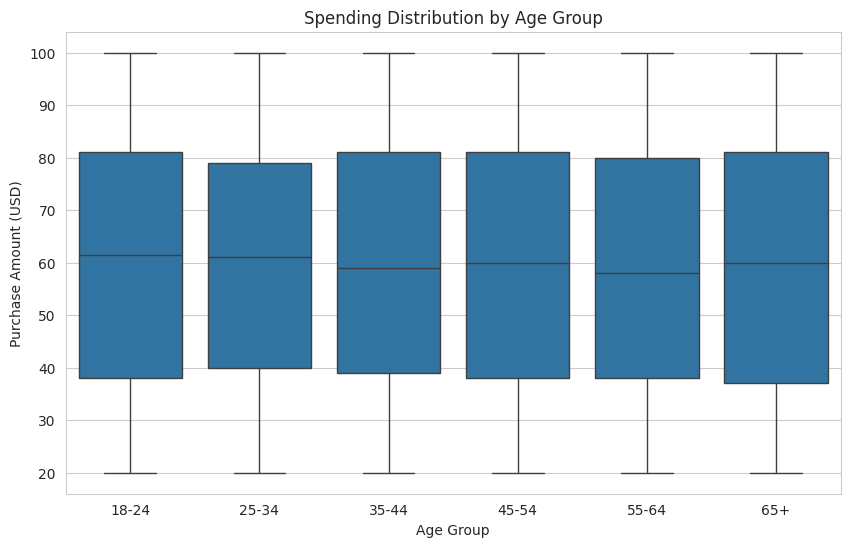

In [22]:
age_spending_summary = df.groupby('Age_Group')['Purchase Amount (USD)'].agg(
    Average_Spend='mean',
    Median_Spend='median',
    Total_Spend='sum',
    Customers='count'
)

print(age_spending_summary.round(2))

plt.figure(figsize=(10,6))
sns.boxplot(x='Age_Group', y='Purchase Amount (USD)', data=df)

plt.title("Spending Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Purchase Amount (USD)")

plt.show()



/tmp/ipython-input-2036812201.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_totals = df.groupby("Age_Group")["Purchase Amount (USD)"].sum().sort_values(ascending=False)


Top 3 highest-spending age groups:
['25-34', '45-54', '55-64']


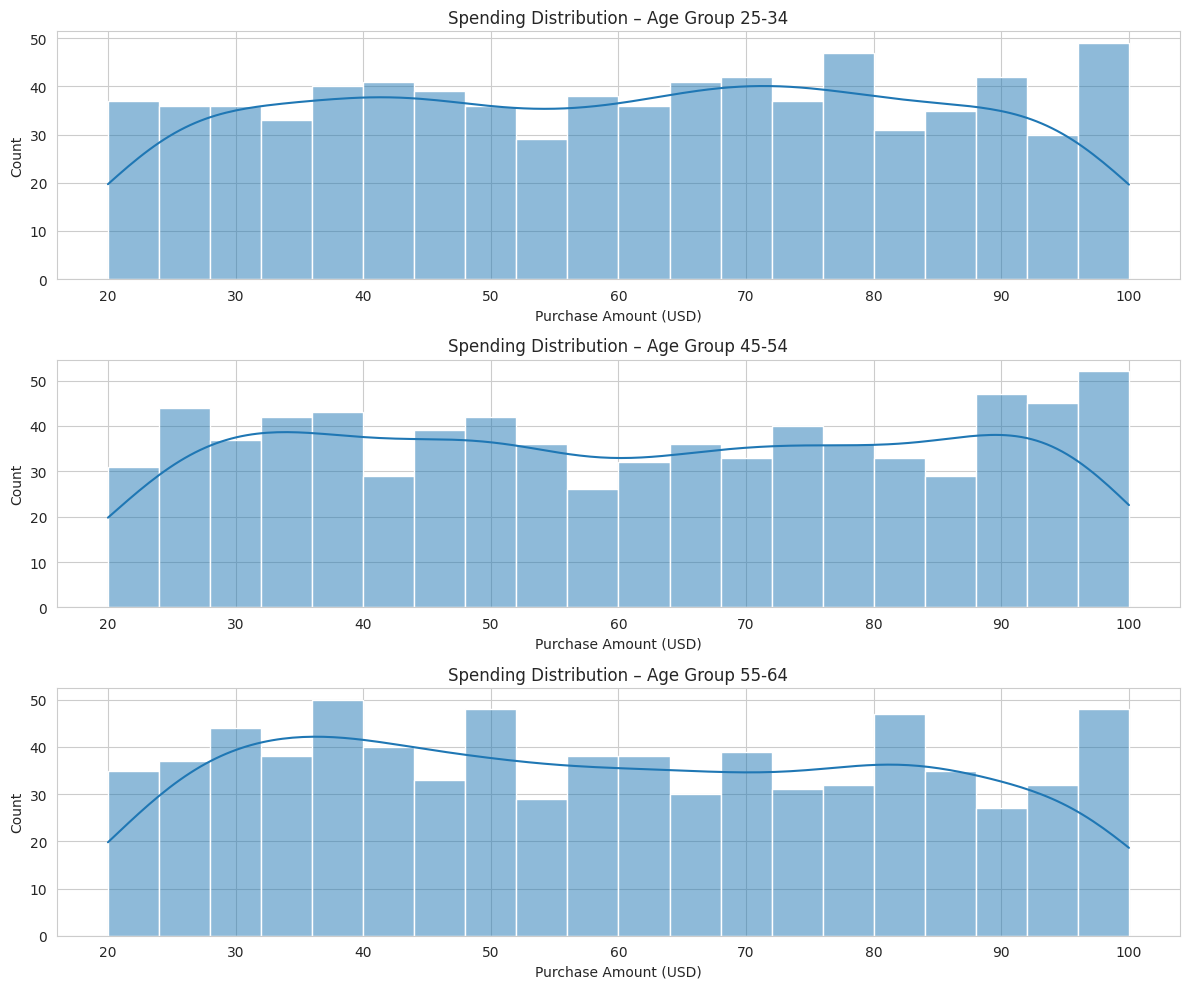


Normality tests + 95% Confidence Intervals for Top 3 Groups:

  Age_Group    n    Mean     Std  CI_Low_95  CI_High_95  Shapiro_p
0     25-34  755  60.132  23.294     58.468      61.797        0.0
1     45-54  752  60.332  23.987     58.615      62.050        0.0
2     55-64  751  58.716  23.363     57.043      60.390        0.0

Interpretation:
- Shapiro_p > 0.05 → distribution ≈ normal
- CI_Low_95 and CI_High_95 describe the mean purchase CI


In [24]:
from scipy import stats

# top 3 spending age groups
age_totals = df.groupby("Age_Group")["Purchase Amount (USD)"].sum().sort_values(ascending=False)
top_3_age_groups = age_totals.head(3).index.tolist()

print("Top 3 highest-spending age groups:")
print(top_3_age_groups)

df_top3 = df[df["Age_Group"].isin(top_3_age_groups)].copy()

# -----------------------------------------
# 3. HISTS + KDE FOR TOP 3 GROUPS
# -----------------------------------------
plt.figure(figsize=(12, 10))

for i, grp in enumerate(top_3_age_groups, start=1):
    plt.subplot(len(top_3_age_groups), 1, i)
    data = df_top3[df_top3["Age_Group"] == grp]["Purchase Amount (USD)"]
    sns.histplot(data, kde=True, bins=20)
    plt.title(f"Spending Distribution – Age Group {grp}")
    plt.xlabel("Purchase Amount (USD)")

plt.tight_layout()
plt.show()

# -----------------------------------------
# 4. Normality Test + Confidence Intervals
# -----------------------------------------
print("\nNormality tests + 95% Confidence Intervals for Top 3 Groups:\n")

results = []

for grp in top_3_age_groups:
    data = df_top3[df_top3["Age_Group"] == grp]["Purchase Amount (USD)"]
    n = len(data)
    mean = data.mean()
    std = data.std(ddof=1)

    # Shapiro-Wilk (good for <5000 samples)
    stat, p_value = stats.shapiro(data)

    # 95% CI for mean
    alpha = 0.05
    t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
    margin = t_crit * std / np.sqrt(n)

    results.append([grp, n, mean, std, mean - margin, mean + margin, p_value])

results_df = pd.DataFrame(
    results,
    columns=["Age_Group", "n", "Mean", "Std", "CI_Low_95", "CI_High_95", "Shapiro_p"]
)

print(results_df.round(3))
print("\nInterpretation:")
print("- Shapiro_p > 0.05 → distribution ≈ normal")
print("- CI_Low_95 and CI_High_95 describe the mean purchase CI")

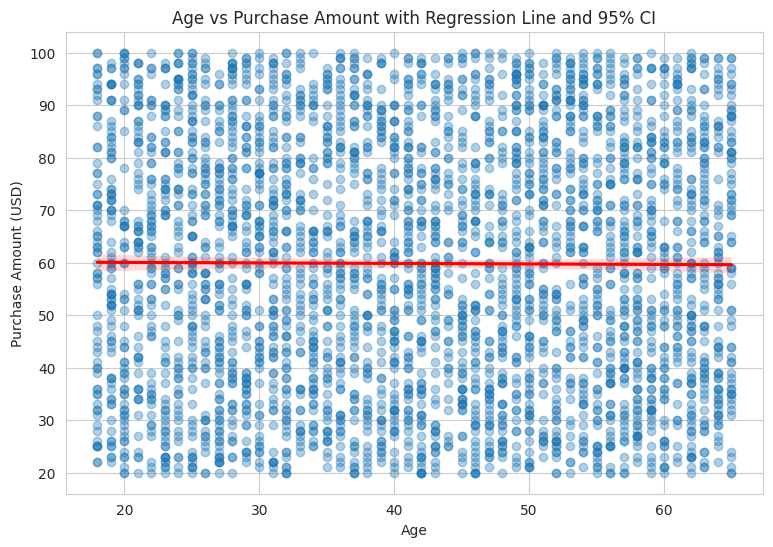

In [25]:
# -----------------------------------------
# 5. Regression with confidence intervals
# -----------------------------------------
df_range = df[(df["Age"] >= 18) & (df["Age"] <= 65)].copy()

plt.figure(figsize=(9,6))
sns.regplot(
    x="Age",
    y="Purchase Amount (USD)",
    data=df_range,
    scatter_kws={"alpha": 0.35},
    line_kws={"color": "red"},
    ci=95
)

plt.title("Age vs Purchase Amount with Regression Line and 95% CI")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.show()

/tmp/ipython-input-3104221153.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items["Age_Group"] = df_items["Age_Group"].cat.remove_unused_categories()


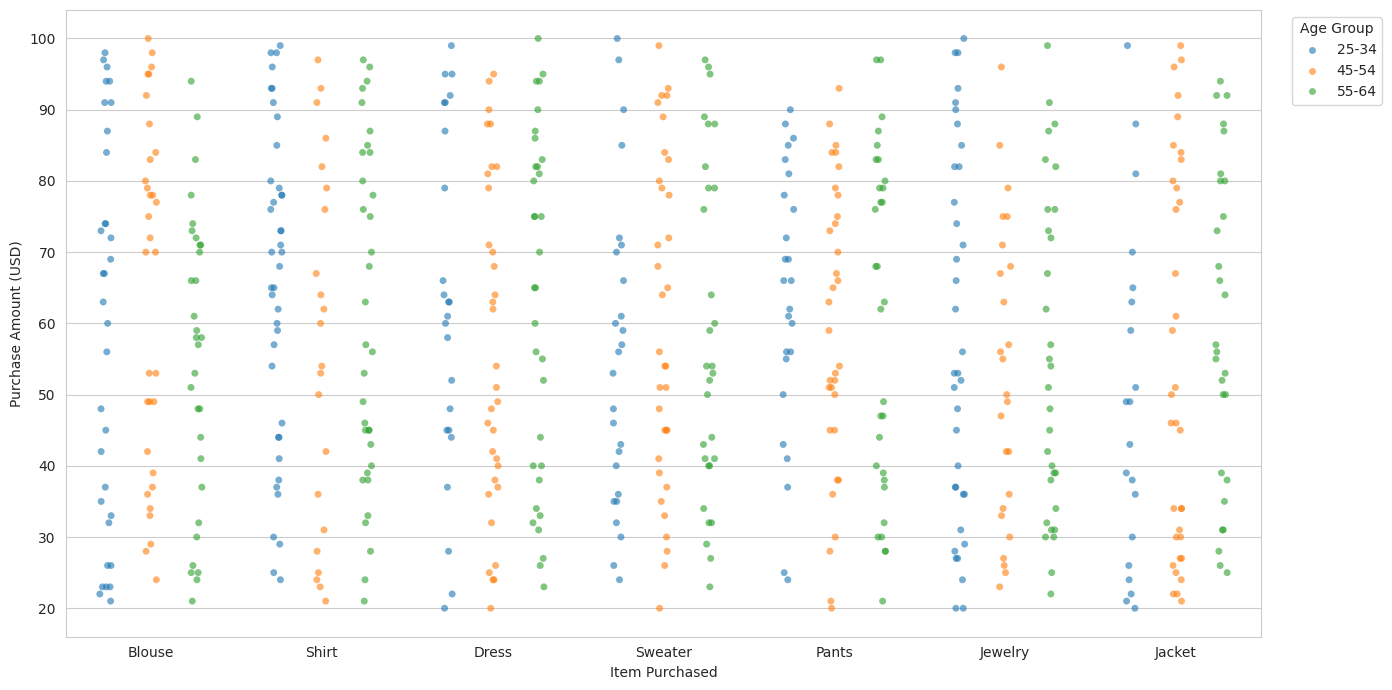

In [21]:
# ---------------------------------------------------------
# 6. Scatterplot of items vs amount (colored by Age Group)
# ---------------------------------------------------------
# Identify top 7 items
top_items = df['Item Purchased'].value_counts().head(7).index.tolist()
df_items = df_top3[df_top3["Item Purchased"].isin(top_items)]
df_items["Age_Group"] = df_items["Age_Group"].cat.remove_unused_categories()

plt.figure(figsize=(14,7))
sns.stripplot(
    data=df_items,
    x="Item Purchased",
    y="Purchase Amount (USD)",
    hue="Age_Group",
    dodge=True,
    alpha=0.6
)
plt.legend(title="Age Group", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [14]:
df_top_items = df[df['Item Purchased'].isin(top_items_list)]
age_item_matrix = df_top_items.pivot_table(
    values='Purchase Amount (USD)',
    index='Age_Group',
    columns='Item Purchased',
    aggfunc='sum'
)
print(age_item_matrix.round(2))


Item Purchased  Blouse  Dress  Jacket  Jewelry  Pants  Shirt  Sweater
Age_Group                                                            
18-24             1239   1662    1160      918   1245   1520     1659
25-34             1943   1505     973     2076   1579   2615     1434
35-44             2524   1734    2323     2056   2605   1884     1595
45-54             2065   1855    1849     1311   1949   1244     2038
55-64             1705   2070    1666     1699   1860   2053     1741
65+                934   1494    1278     1950    852   1016      995


/tmp/ipython-input-405077156.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_item_matrix = df_top_items.pivot_table(


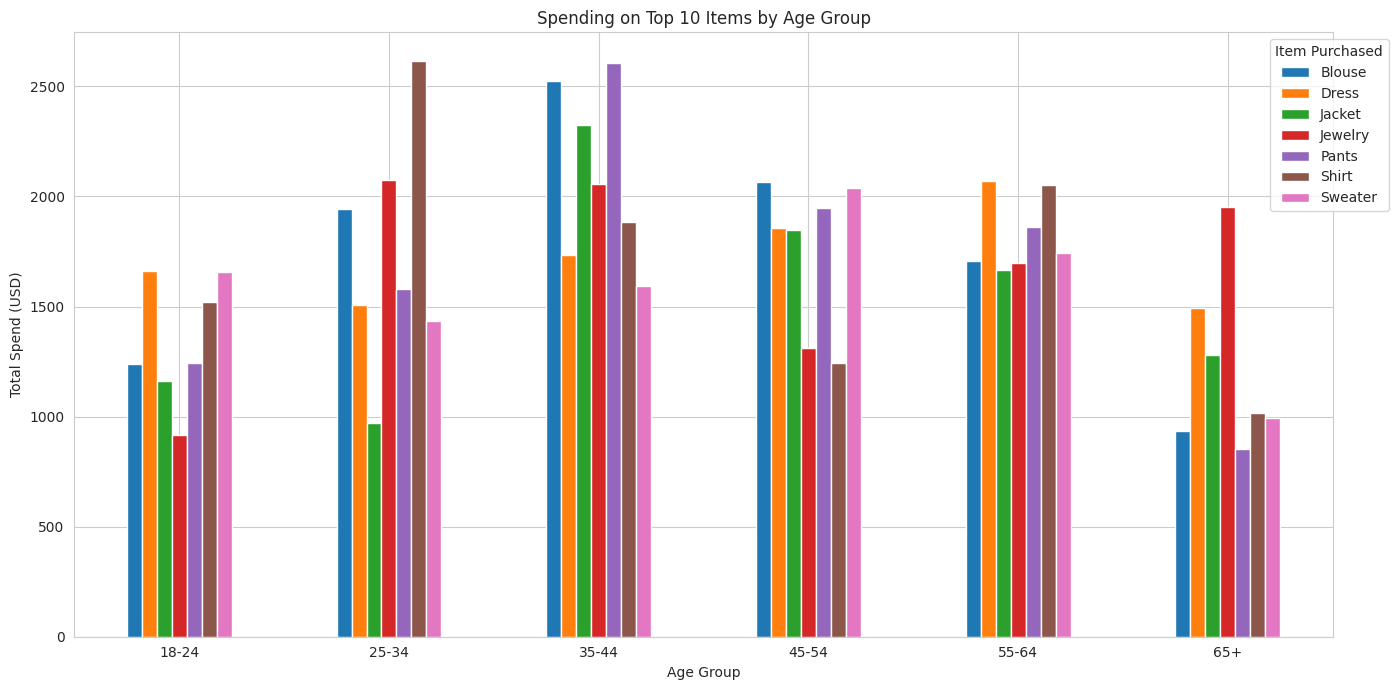

In [15]:
age_item_matrix.plot(kind='bar', figsize=(14,7))

plt.title("Spending on Top 10 Items by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Spend (USD)")
plt.xticks(rotation=0)
plt.legend(title="Item Purchased", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()



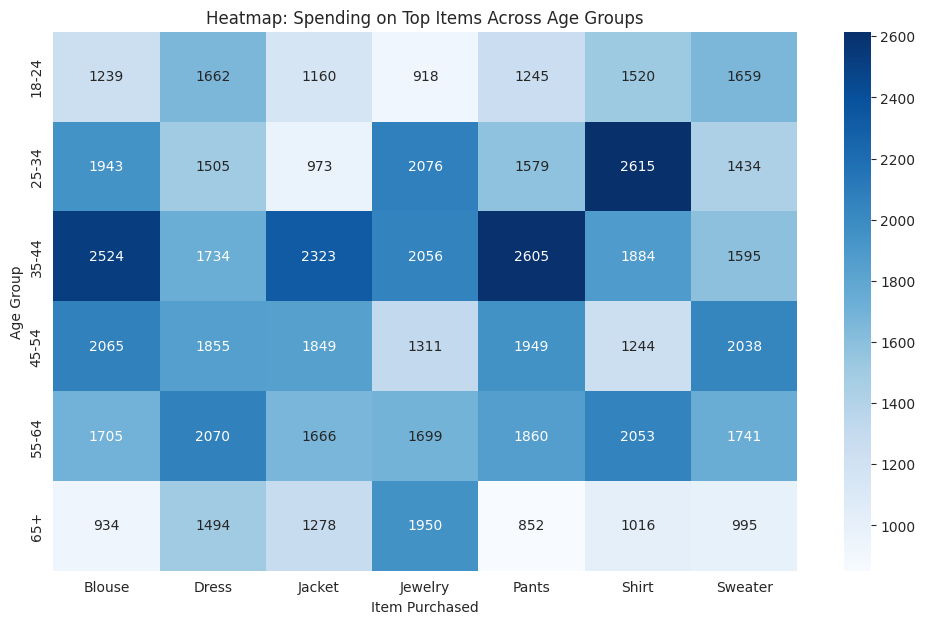

In [16]:
plt.figure(figsize=(12,7))
sns.heatmap(
    age_item_matrix,
    annot=True,
    fmt=".0f",
    cmap="Blues"
)

plt.title("Heatmap: Spending on Top Items Across Age Groups")
plt.xlabel("Item Purchased")
plt.ylabel("Age Group")
plt.show()


In [17]:
highest_spending_per_item = age_item_matrix.idxmax()
print("\nHighest spending age group for each top item:")
print(highest_spending_per_item)

total_spending_per_age_group = age_item_matrix.sum(axis=1)
print("\nTotal spending per age group across all top 10 items:")
print(total_spending_per_age_group)

top_3_spending_age_groups = total_spending_per_age_group.nlargest(3)
print("\nTop 3 age groups with the highest overall spending on these items:")
print(top_3_spending_age_groups)



Highest spending age group for each top item:
Item Purchased
Blouse     35-44
Dress      55-64
Jacket     35-44
Jewelry    25-34
Pants      35-44
Shirt      25-34
Sweater    45-54
dtype: category
Categories (6, object): ['18-24' < '25-34' < '35-44' < '45-54' < '55-64' < '65+']

Total spending per age group across all top 10 items:
Age_Group
18-24     9403
25-34    12125
35-44    14721
45-54    12311
55-64    12794
65+       8519
dtype: int64

Top 3 age groups with the highest overall spending on these items:
Age_Group
35-44    14721
55-64    12794
45-54    12311
dtype: int64
